**PROJET 7** : Implémentez un modèle de scoring

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#pip install missingno

In [3]:
#pip install pca

## Checking versions

In [4]:
#Check  versions
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(mpl.__version__))

import numpy as np #foundational package for scientific computing
print("numPy version: {}". format(np.__version__))

import seaborn as sns #graphs
print("seaborn version: {}". format(sns.__version__))


import missingno as msgno #plotting missing values
print("missingno version: {}". format(msgno.__version__))


import pca #principal component analysis
print("pca version: {} ". format(pca.__version__))



import matplotlib.pyplot as plt

sns.set()

Python version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.3.5
matplotlib version: 3.4.2
numPy version: 1.21.4
seaborn version: 0.11.1
missingno version: 0.5.0
pca version: 1.5.2 


## Data schema

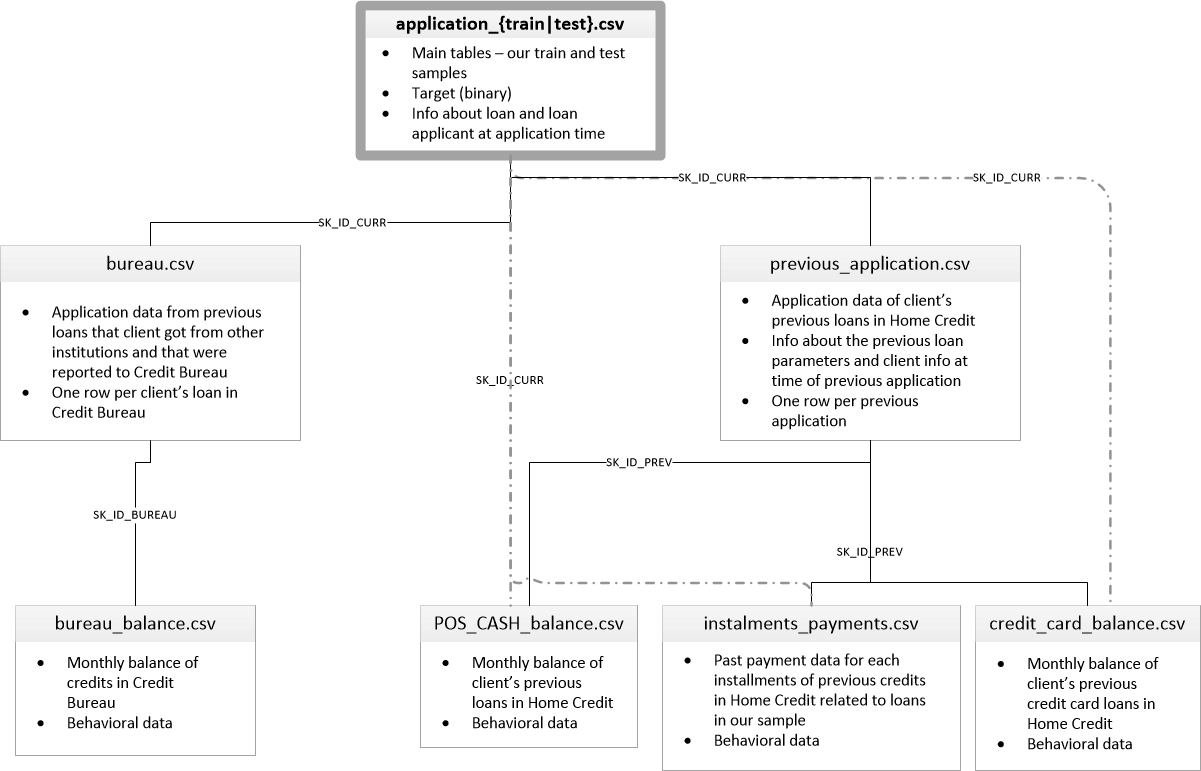

# **Importing pre traited data**


## Loading libraries

In [5]:
# import 'data stack' libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase the maximum number of columns to display
pd.set_option("display.max_columns", 1000)  # Maximum number of columns
pd.set_option("display.max_rows", 1000)  # Maximum number of columns

## Loading data

In [6]:
train = pd.read_csv('data_p7/raw/m_train_small.csv')
test = pd.read_csv('data_p7/raw/m_test_small.csv')

print('Training set full shape: ', train.shape)
print('Testing set full shape: ' , test.shape)

Training set full shape:  (307511, 115)
Testing set full shape:  (48744, 114)


In [7]:
train.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,bureau_DAYS_CREDIT_ENDDATE_max,DAYS_EMPLOYED,DAYS_ID_PUBLISH,bureau_DAYS_CREDIT_max,bureau_AMT_CREDIT_SUM_mean,OWN_CAR_AGE,bureau_AMT_CREDIT_MAX_OVERDUE_mean,DAYS_LAST_PHONE_CHANGE,bureau_DAYS_ENDDATE_FACT_max,DAYS_REGISTRATION,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_min,APARTMENTS_AVG,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_UPDATE_max,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CODE_GENDER_F,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_sum,bureau_DAYS_CREDIT_ENDDATE_mean,YEARS_BEGINEXPLUATATION_AVG,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_CREDIT_ENDDATE_min,LANDAREA_AVG,NAME_EDUCATION_TYPE_Highereducation,BASEMENTAREA_AVG,NAME_CONTRACT_TYPE_Cashloans,bureau_DAYS_CREDIT_UPDATE_mean,COMMONAREA_AVG,bureau_AMT_CREDIT_SUM_LIMIT_max,client_bureau_balance_STATUS_C_count_norm_max,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,client_bureau_balance_STATUS_0_count_norm_mean,bureau_CREDIT_ACTIVE_Active_count,REGION_RATING_CLIENT,NAME_FAMILY_STATUS_Married,bureau_CREDIT_ACTIVE_Closed_count_norm,NONLIVINGAREA_AVG,DEF_30_CNT_SOCIAL_CIRCLE,YEARS_BUILD_AVG,ENTRANCES_AVG,client_bureau_balance_STATUS_0_count_mean,bureau_CREDIT_TYPE_Mortgage_count_norm,FLAG_DOCUMENT_3,bureau_CREDIT_TYPE_Consumercredit_count_norm,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_ANNUITY_mean,FLOORSMIN_AVG,bureau_CREDIT_TYPE_Microloan_count_norm,client_bureau_balance_STATUS_C_count_mean,FLOORSMAX_AVG,client_bureau_balance_STATUS_1_count_norm_max,client_bureau_balance_STATUS_1_count_norm_mean,client_bureau_balance_MONTHS_BALANCE_count_mean,bureau_CREDIT_TYPE_Creditcard_count_norm,client_bureau_balance_STATUS_0_count_max,client_bureau_balance_STATUS_X_count_mean,bureau_CREDIT_TYPE_Creditcard_count,AMT_REQ_CREDIT_BUREAU_QRT,bureau_CREDIT_TYPE_Carloan_count_norm,bureau_AMT_ANNUITY_min,bureau_AMT_CREDIT_MAX_OVERDUE_count,client_bureau_balance_MONTHS_BALANCE_max_mean,client_bureau_balance_STATUS_0_count_norm_min,bureau_AMT_ANNUITY_max,NONLIVINGAPARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,client_bureau_balance_MONTHS_BALANCE_count_min,NAME_INCOME_TYPE_Working,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Closed_count,client_bureau_balance_STATUS_X_count_norm_max,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_Selfemployed,NAME_EDUCATION_TYPE_Secondarysecondaryspecial,client_bureau_balance_STATUS_X_count_norm_mean,FLAG_DOCUMENT_18,client_bureau_balance_MONTHS_BALANCE_mean_sum,FLAG_WORK_PHONE,OCCUPATION_TYPE_Corestaff,client_bureau_balance_STATUS_0_count_norm_max,bureau_AMT_CREDIT_SUM_LIMIT_min,client_bureau_balance_STATUS_X_count_max,NAME_INCOME_TYPE_Stateservant,FLAG_DOCUMENT_13,ORGANIZATION_TYPE_Construction,bureau_CREDIT_TYPE_Microloan_count,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_AMT_CREDIT_SUM_OVERDUE_max,OCCUPATION_TYPE_Laborers,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,client_bureau_balance_STATUS_1_count_mean,ORGANIZATION_TYPE_BusinessEntityType3,bureau_AMT_CREDIT_SUM_OVERDUE_mean,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,client_bureau_balance_STATUS_X_count_min,TARGET,SK_ID_CURR
0,0.083037,0.262949,0.139376,-9461,406597.5,24700.5,780.0,-637,-2120,-103.0,108131.945625,NaN,1681.029,-1134.0,-36.0,-3648.0,49156.2,0.0,0.0247,-874.00,-7.0,0.018801,202500.0,0,245781.0,-1185.0,-6992.0,-349.0,0.9722,7997.14125,-697.500000,-1072.0,0.0369,0,0.0369,1,-499.875,0.0143,31988.565,0.8125,1.0,10,0.40696,2.0,2,0,0.75,0.0000,2.0,0.6192,0.0690,5.625,0.0,1,0.5,0.0,0.0,0.1250,0.0,2.875,0.0833,0.5,0.255682,13.75,0.5,18.0,1.875,4.0,0.0,0.0,0.0,5.0,-15.5,0.1875,0.0,0.0000,2.0,4.0,1,0.25,6.0,0.5,0,0,1,0.161932,0,-175.0,0,0,0.818182,0.0,3.0,0,0,0,0.0,0,0,0.0,0.0,1,0.0,0,0,3.375,1,0.0,0,0,1,0,0.0,1,100002
1,0.311267,0.622246,NaN,-16765,1293502.5,35698.5,1216.0,-1188,-291,-606.0,254350.

## Indexation on 'SK_ID_CURR'

In [8]:
# Indexing on SK_ID_CURR, both for train and test sets
train = train.set_index('SK_ID_CURR')
test = test.set_index('SK_ID_CURR')

# **EXPLORATION**

## Duplicates

In [9]:
# %%flake8  # checking PEP8 compliance

def contains_duplicates(dataframe):
    """This function checks the presence of duplicates rows in a dataframe."""

    mask = dataframe.duplicated(keep='first')
    nb_duplicates = len(dataframe[mask])

    if nb_duplicates == 0:
        return False

    else:
        return True

In [10]:
contains_duplicates(train)

False

## Missing values

In [11]:
def global_filling_rate(dataframe):
    """Compute and displays global filling rate of a DataFrame"""

    # get the numbers of rows and columns in the dataframe
    nb_rows, nb_columns = dataframe.shape
    print("DataFrame has {} rows and {} columns.".format(nb_rows, nb_columns))

    # get the number of non-Nan data in the dataframe
    nb_data = dataframe.count().sum()

    # computing the filling rate
    filling_rate = nb_data / (nb_rows * nb_columns)
    missing_rate = 1 - filling_rate

    # computing the total missing values
    missing_values = (nb_rows * nb_columns) - nb_data

    # display global results
    print("")
    print("Global filling rate of the DataFrame: {:.2%}".format(filling_rate))
    print("Missing values in the DataFrame: {} ({:.2%})"
          .format(missing_values, missing_rate))

    # compute number of rows with missing values
    mask = dataframe.isnull().any(axis=1)
    rows_w_missing_values = len(dataframe[mask])
    rows_w_missing_values_percentage = rows_w_missing_values / nb_rows

    # display results
    print("")
    print("Number of rows with missing values: {} ({:.2%})"
          .format(rows_w_missing_values, rows_w_missing_values_percentage))

    # compute number of columns with missing values
    mask = dataframe.isnull().any(axis=0)
    cols_w_missing_values = len(dataframe[dataframe.columns[mask]].columns)
    cols_w_missing_values_percentage = cols_w_missing_values / nb_columns

    # display results
    print("Number of columns with missing values: {} ({:.2%})"
          .format(cols_w_missing_values, cols_w_missing_values_percentage))

In [12]:
global_filling_rate(train)

DataFrame has 307511 rows and 114 columns.

Global filling rate of the DataFrame: 74.52%
Missing values in the DataFrame: 8932303 (25.48%)

Number of rows with missing values: 304709 (99.09%)
Number of columns with missing values: 79 (69.30%)


In [13]:
def columns_filling_rate(dataframe, columns='all', missing_only=False):
    """Calculate and displays the filling rate for
    a particular column in a pd.DataFrame."""
    
    # Importations
    import pandas as pd
    import numpy as np
    
    # If 'feature' is not specified
    if columns == 'all':
        columns = dataframe.columns
        
    
    # initialization of the results DataFrame
    results = pd.DataFrame(columns=['nb_values', 'missing_values', 'filling_rate'])
        
    # for each feature
    for column in columns:

        # Count of the values on each column
        values_count = dataframe[column].count()
        
        # Computing missing values
        nb_rows = dataframe.shape[0]
        missing_values = nb_rows - values_count

        # Computing filling rates
        filling_rate = values_count / nb_rows
        if missing_only and missing_values == 0:
            filling_rate = np.nan
        
        # Adding a row in the results' dataframe
        results.loc[column] = [values_count, missing_values, filling_rate]

    # Sorting the features by number of missing_values
    results = results.dropna(subset=['filling_rate'])
    results = results.sort_values('filling_rate')
    
    if results.empty == False:
        return results
    else:
        print("No missing value.")

In [14]:
columns_filling_rate(train, columns='all', missing_only=True)

,nb_values,missing_values,filling_rate
bureau_AMT_ANNUITY_mean,80009.0,227502.0,0.260183
bureau_AMT_ANNUITY_max,80009.0,227502.0,0.260183
bureau_AMT_ANNUITY_min,80009.0,227502.0,0.260183
client_bureau_balance_STATUS_X_count_min,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_0_count_norm_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_0_count_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_C_count_mean,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_1_count_norm_max,92231.0,215280.0,0.299927
client_bureau_balance_STATUS_1_count_norm_mean,92231.0,215280.0,0.299927
client_bureau_balance_MONTHS_BALANCE_count_mean,92231.0,215280.0,0.299927


<AxesSubplot:>

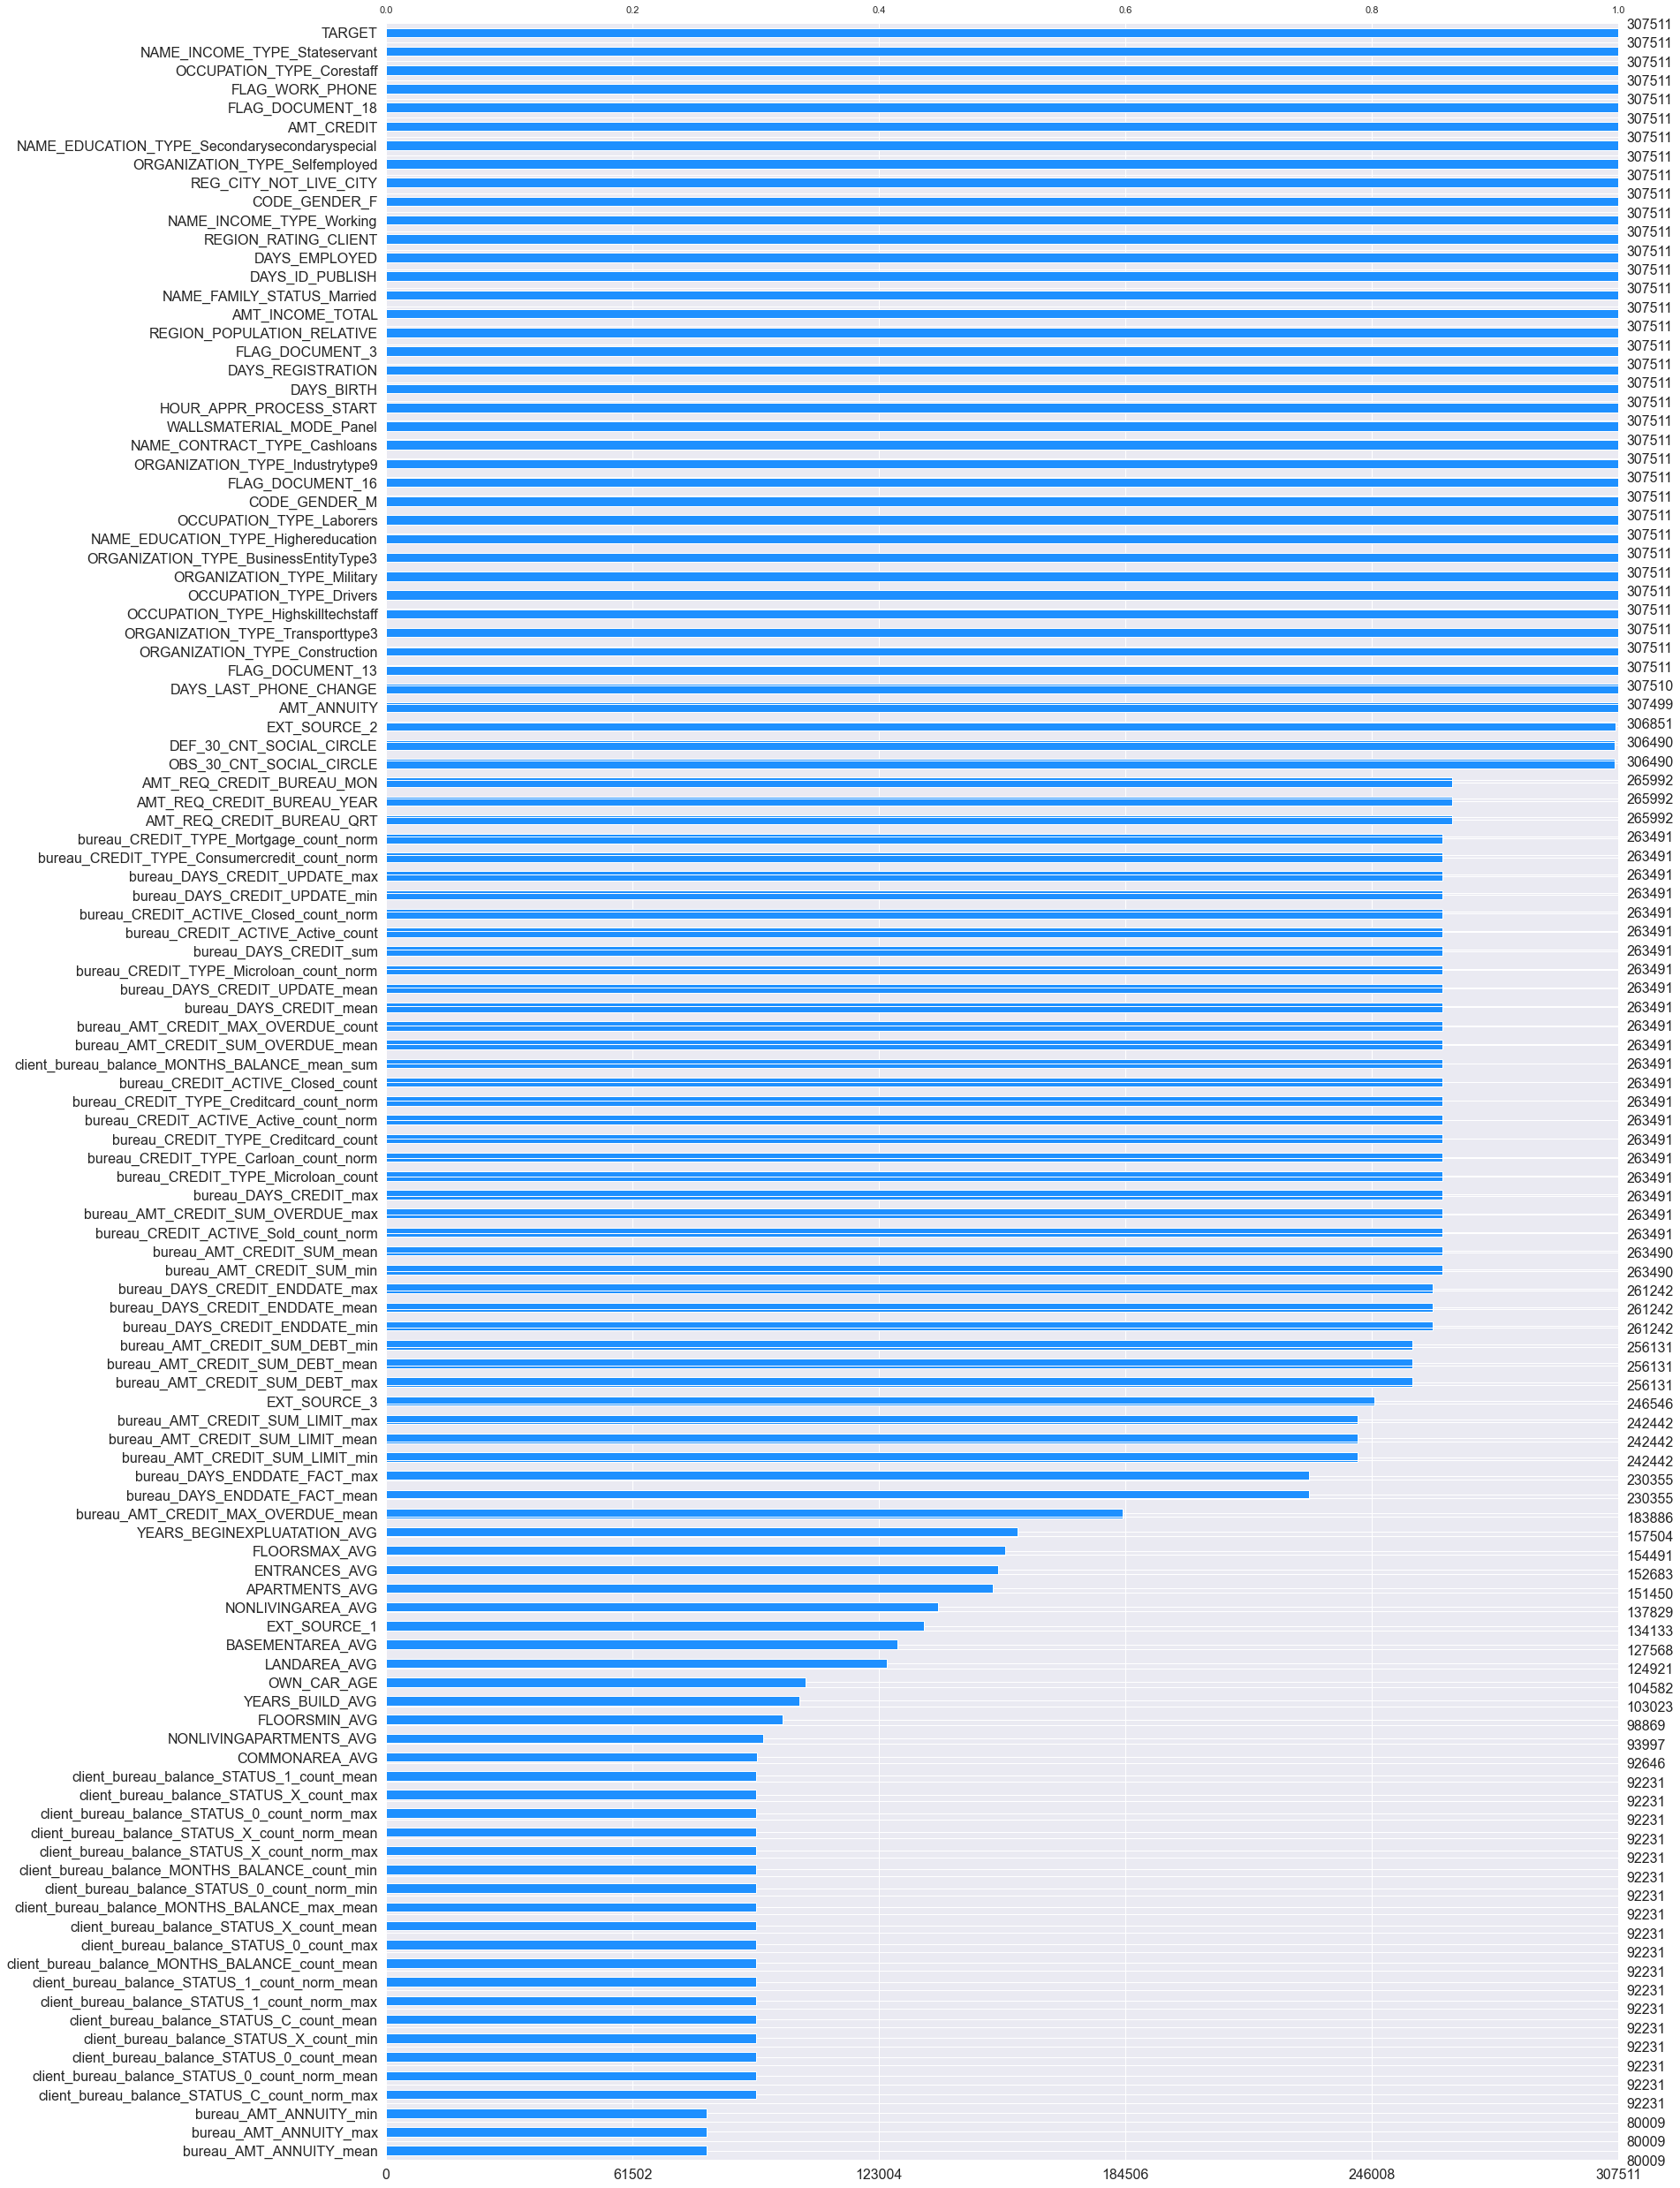

In [15]:
msgno.bar(train,color="dodgerblue", sort="ascending")


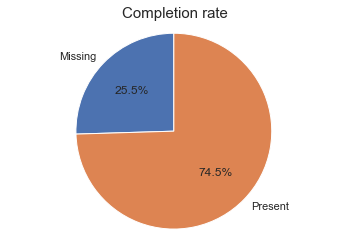

In [16]:
labels = 'Missing', 'Present'

fig, ax = plt.subplots()
sizes = train.isnull().sum().sum(), train.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Completion rate',fontsize=15)

plt.show()

In [17]:
# Dropping the columns where filling rate < 90%
# ----------------------------------------------

def get_features_under_filling_threshold(features_df, threshold=0.9):
    # computing the filling rates
    col_fillings = columns_filling_rate(features_df, columns='all', missing_only=True)

    # creating a mask for filling rate < threshold
    mask = col_fillings['filling_rate'] < threshold

    # getting the list of features
    set_cols_to_delete = set(col_fillings[mask].index)
    return set_cols_to_delete


set_cols_to_delete_train = get_features_under_filling_threshold(train, threshold=0.9)
set_cols_to_delete_test = get_features_under_filling_threshold(train, threshold=0.9)
set_cols_to_delete = set_cols_to_delete_train.union(set_cols_to_delete_test)

# deleting the rows both in train set and test set
train = train.drop(columns=set_cols_to_delete)
test = test.drop(columns=set_cols_to_delete)

global_filling_rate(train)
print(train.shape)
print(test.shape)

DataFrame has 307511 rows and 40 columns.

Global filling rate of the DataFrame: 99.98%
Missing values in the DataFrame: 2715 (0.02%)

Number of rows with missing values: 1689 (0.55%)
Number of columns with missing values: 5 (12.50%)
(307511, 40)
(48744, 39)


In [18]:
columns_filling_rate(train, columns='all', missing_only=True)

,nb_values,missing_values,filling_rate
DEF_30_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680
EXT_SOURCE_2,306851.0,660.0,0.997854
AMT_ANNUITY,307499.0,12.0,0.999961
DAYS_LAST_PHONE_CHANGE,307510.0,1.0,0.999997


In [19]:
def filtering_rows(df, threshold=0.9):

    import seaborn as sns

    # Compute the filling rates of each row
    filling_rate_rows = df.notna().mean(axis=1)

    # Display the histogram and KDE of the distribution
    ax = sns.distplot(filling_rate_rows, kde=False)

    # Create a mask for rows where filling rate is above threhold
    mask = filling_rate_rows > threshold

    # Filtering the DataFrame
    filtered_df = df[mask]

    # Display the results
    print('Threshold for filling rate:', threshold)
    print('Rows under threshold:', len(df) - len(filtered_df))
    print('Rows above threshold:', len(filtered_df))

    # Return the filtered DataFrame
    return filtered_df

Threshold for filling rate: 0.9
Rows under threshold: 0
Rows above threshold: 307511


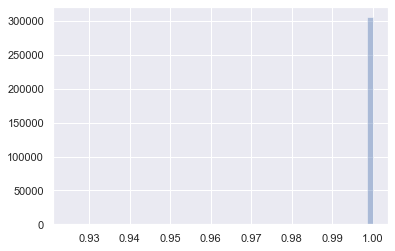

In [20]:
train = filtering_rows(train, threshold=0.9)

## Data types

df shape = (307511, 40)
NaN rate over whole df = 0%
df duplicates rate = 0%


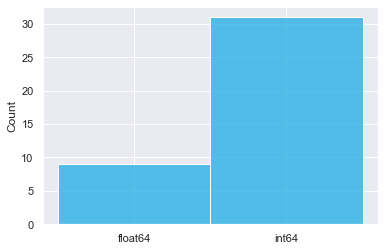

SK_ID_CURR,100002,100003,100004,100006,100007
EXT_SOURCE_2,0.262949,6.222458e-01,0.555912,0.650442,0.322738
DAYS_BIRTH,-9461.000000,-1.676500e+04,-19046.000000,-19005.000000,-19932.000000
AMT_CREDIT,406597.500000,1.293502e+06,135000.000000,312682.500000,513000.000000
AMT_ANNUITY,24700.500000,3.569850e+04,6750.000000,29686.500000,21865.500000
DAYS_EMPLOYED,-637.000000,-1.188000e+03,-225.000000,-3039.000000,-3038.000000
DAYS_ID_PUBLISH,-2120.000000,-2.910000e+02,-2531.000000,-2437.000000,-3458.000000
DAYS_LAST_PHONE_CHANGE,-1134.000000,-8.280000e+02,-815.000000,-617.000000,-1106.000000
DAYS_REGISTRATION,-3648.000000,-1.186000e+03,-4260.000000,-9833.000000,-4311.000000
REGION_POPULATION_RELATIVE,0.018801,3.541000e-03,0.010032,0.008019,0.028663
AMT_INCOME_TOTAL,202500.000000,2.700000e+05,67500.000000,135000.000000,121500.000000


In [21]:
from IPython.display import display, HTML
print(f'df shape = {train.shape}')
print(f'NaN rate over whole df = {train.isna().sum().sum()/train.size:.0%}')
print(f'df duplicates rate = {(len(train)-len(train.drop_duplicates()))/len(train):.0%}')

sns.histplot(train.dtypes.astype('string').sort_values(), color = '#1CADE4');
plt.show()

display(HTML(train.head(5).T.to_html()))

In [22]:
train.describe()

,EXT_SOURCE_2,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,CODE_GENDER_F,NAME_EDUCATION_TYPE_Highereducation,NAME_CONTRACT_TYPE_Cashloans,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,NAME_FAMILY_STATUS_Married,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,OBS_30_CNT_SOCIAL_CIRCLE,NAME_INCOME_TYPE_Working,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE_Selfemployed,NAME_EDUCATION_TYPE_Secondarysecondaryspecial,FLAG_DOCUMENT_18,FLAG_WORK_PHONE,OCCUPATION_TYPE_Corestaff,NAME_INCOME_TYPE_Stateservant,FLAG_DOCUMENT_13,ORGANIZATION_TYPE_Construction,OCCUPATION_TYPE_Drivers,ORGANIZATION_TYPE_Military,OCCUPATION_TYPE_Laborers,FLAG_DOCUMENT_16,ORGANIZATION_TYPE_Industrytype9,ORGANIZATION_TYPE_BusinessEntityType3,WALLSMATERIAL_MODE_Panel,ORGANIZATION_TYPE_Transporttype3,CODE_GENDER_M,OCCUPATION_TYPE_Highskilltechstaff,TARGET
count,3.068510e+05,307511.000000,3.075110e+05,307499.000000,307511.000000,307511.000000,307510.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,307511.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,5.143927e-01,-16036.995067,5.990260e+05,27108.573909,63815.045904,-2994.202373,-962.858788,-4986.120328,0.020868,1.687979e+05,0.658344,0.243448,0.904787,12.063419,2.052463,0.638780,0.143421,0.710023,1.422245,0.516320,0.078173,0.124913,0.710189,0.008130,0.199368,0.089655,0.070576,0.003525,0.021856,0.060495,0.008566,0.179460,0.009928,0.010952,0.221104,0.214757,0.003860,0.341643,0.037007,0.080729
std,1.910602e-01,4363.988632,4.024908e+05,14493.737315,141275.766519,1509.450419,826.808487,3522.886321,0.013831,2.371231e+05,0.474266,0.429164,0.293509,3.265832,0.509034,0.480355,0.446698,0.453752,2.400989,0.499734,0.268444,0.330620,0.453675,0.089798,0.399526,0.285688,0.256116,0.059268,0.146214,0.238403,0.092153,0.383738,0.099144,0.104079,0.414991,0.410654,0.062009,0.474261,0.188779,0.272419
min,8.173617e-08,-25229.000000,4.500000e+04,1615.500000,-17912.000000,-7197.000000,-4292.000000,-24672.000000,0.000290,2.565000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.924574e-01,-19682.000000,2.700000e+05,16524.000000,-2760.000000,-4299.000000,-1570.000000,-7479.500000,0.010006,1.125000e+05,0.000000,0.000000,1.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.659614e-01,-15750.000000,5.135310e+05,24903.000000,-1213.000000,-3254.000000,-757.000000,-4504.000000,0.018850,1.471500e+05,1.000000,0.000000,1.000000,12.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.636171e-01,-12413.000000,8.086500e+05,34596.000000,-289.000000,-1720.000000,-274.000000,-2010.000000,0.028663,2.025000e+05,1.000000,0.000000,1.000000,14.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.549997e-01,-7489.000000,4.050000e+06,258025.500000,365243.000000,0.000000,0.000000,0.000000,0.072508,1.170000

In [23]:
train.dtypes

EXT_SOURCE_2                                     float64
DAYS_BIRTH                                         int64
AMT_CREDIT                                       float64
AMT_ANNUITY                                      float64
DAYS_EMPLOYED                                      int64
DAYS_ID_PUBLISH                                    int64
DAYS_LAST_PHONE_CHANGE                           float64
DAYS_REGISTRATION                                float64
REGION_POPULATION_RELATIVE                       float64
AMT_INCOME_TOTAL                                 float64
CODE_GENDER_F                                      int64
NAME_EDUCATION_TYPE_Highereducation                int64
NAME_CONTRACT_TYPE_Cashloans                       int64
HOUR_APPR_PROCESS_START                            int64
REGION_RATING_CLIENT                               int64
NAME_FAMILY_STATUS_Married                         int64
DEF_30_CNT_SOCIAL_CIRCLE                         float64
FLAG_DOCUMENT_3                

## Class balance

In [24]:
def categorical_distribution(dataframe, feature, ordinal=False):
    """Function plotting the bar-plot and pie-plot (as subplots) for 
    a distribution of categorical features."""
    
    # importing libraries
    import matplotlib.pyplot as plt

    # filtering non-null data for the feature
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]
    
    # Setting the data to plot
    x=data_view[feature]
    
    # Set frequencies and labels, sorting by index
    if ordinal==True:
        labels = list(x.value_counts().sort_index().index.astype(str))
        frequencies = x.value_counts().sort_index()
    else:
        labels = list(x.value_counts().sort_values(ascending=False).index.astype(str))
        frequencies = x.value_counts().sort_values(ascending=False)
    
    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))
    
    plt.suptitle("Empiric statistical distribution: " + feature, fontsize=25)
    
    # Main graphical properties of the first subplot (histogram)
    ax1 = plt.subplot(121)
    ax1.set_xlabel("Values", fontsize=20)
    ax1.set_ylabel("Frequencies", fontsize=20)
    ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")

    # Main graphical properties of the second subplot (pieplot)
    ax2 = plt.subplot(122)
    ax2.set_xlabel("Relative frequencies", fontsize=20)
    
    # plotting the plots
    ax1.bar(labels, frequencies)
    ax2.pie(frequencies,
            autopct='%1.2f%%',
            shadow=True,
              )
    
    ax2.legend(labels)
    plt.show()
    return fig

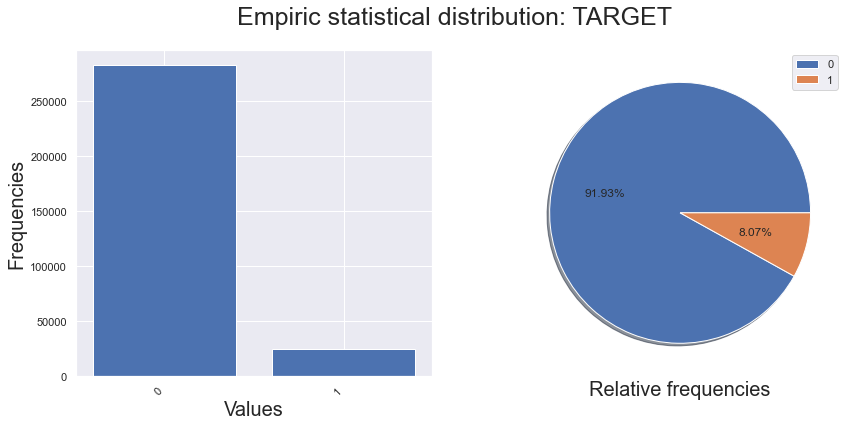

In [25]:
fig = categorical_distribution(
    train,
    'TARGET'
)

fig.savefig('plots/imba_classes.png')

## Cleaned data

In [26]:
train.to_csv('data_p7/cleaned/data_train_featured.csv')

# **Preparation**

In [27]:
import pandas as pd

train = pd.read_csv('data_p7/cleaned/data_train_featured.csv', index_col='SK_ID_CURR')

In [28]:
# Set random integer (seed) - 891
from random import randrange
seed = randrange(1000)
print("Seed value: ", seed)

Seed value:  248


## Separation 

In [29]:
from sklearn.model_selection import train_test_split

# Splitting features and targets
X = train.drop(columns='TARGET')
y = train['TARGET']

# Splitting into fitting set and evaluation set
(X_fit, X_eval, y_fit, y_eval) = train_test_split(
        X,
        y,
        train_size=0.8,
        test_size=0.2,
        random_state=seed,
        stratify=y, # because classes are imbalanced
    )

## **Imputations**

In [30]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='median')
imp_mean.fit(X_fit)

feature_names = X_fit.columns
index_X_fit = X_fit.index
index_X_eval = X_eval.index

X_fit = pd.DataFrame(imp_mean.transform(X_fit), columns=feature_names, index=index_X_fit)
X_eval = pd.DataFrame(imp_mean.transform(X_eval), columns=feature_names, index=index_X_eval)

## Balancing

In [31]:
#pip install imblearn

### Oversampling

Counter({0: 4950, 1: 50})
Counter({0: 4950, 1: 4950})


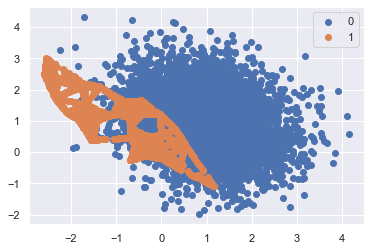

In [32]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X_fit_sample, y_fit_sample = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_fit_sample)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_fit_sample == label)[0]
    pyplot.scatter(X_fit_sample[row_ix, 0], X_fit_sample[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Selection of pipleline

## Selection


### Metric

* $gain = TP·TP\_value + TN·TN\_value + FP·FP\_value + FN·FN\_value$
* $max\_gain = N·TN\_value + P·TP\_value$
* $baseline = (TN+FP)·TN\_value + (TP+FN)·FN\_value$

=> $score = \frac{gain - baseline}{max\_gain - baseline} ∈ [0 ; 1]$

=> $model\_score = \underset{threshold \in [0;1]}{\text{max}} [score] ∈ [0 ; 1]$

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix

def custom_score(y_true, y_pred):
    # Relative loss and gains for each case
    TP_value = 0       # expected default
    FP_value = 0       # unexpected not-default (real: not-default, predicted: default)
    FN_value = -10     # unexpected default (real: default(P), predicted: not-default(N))
    TN_value = 1       # expected not-default

    # Confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_true, y_pred).ravel()

    # Full negative and positive cases
    N = TN + FP # total true not-default
    P = TP + FN # total true default
    
    gain = TP*TP_value + TN*TN_value + FP*FP_value + FN*FN_value
    # perfect model, 0 error
    best = N*TN_value + P*TP_value
    # worst = P*FN_value + N*FP_value
    # baseline : strategy : “most_frequent” (N) 
    baseline = N*TN_value + P*FN_value
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain - baseline) / (best - baseline)
    return score


def predict_threshold(model, X, threshold=0.5):
    predictions = model.predict_proba(X)
    mask = (predictions[:, 1] > threshold)
    return mask.astype(int)


def custom_scorer(model, X, y_true):
    scores = []
    for threshold in np.linspace(0, 1, num=101):
    #threshold = 0.5
        y_pred = predict_threshold(model, X, threshold=threshold)
        score = custom_score(y_true, y_pred)
        scores.append(score)
    # print(max(scores))
    return max(scores)
    # return score

# Evaluation

### Naïve bayes : Baseline


In [34]:
from sklearn.dummy import DummyClassifier

# Creating a naïve baseline model predicting non-defaut
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(X_fit, y_fit)

DummyClassifier(constant=0, strategy='constant')

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
y_prob = baseline.predict_proba(X_eval)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)

# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

mse = metrics.mean_squared_error(y_eval, y_prob)
auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)

TN = 56538, FP = 0, FN = 4965, TP = 0


TN = 56538, FP = 0, FN = 4965, TP = 0
Testset: threshold = 100%, G-Mean= 0%, AUC = 50%, RMSE = 28%, recall= 0%, precision= 0%, f1 = 0%


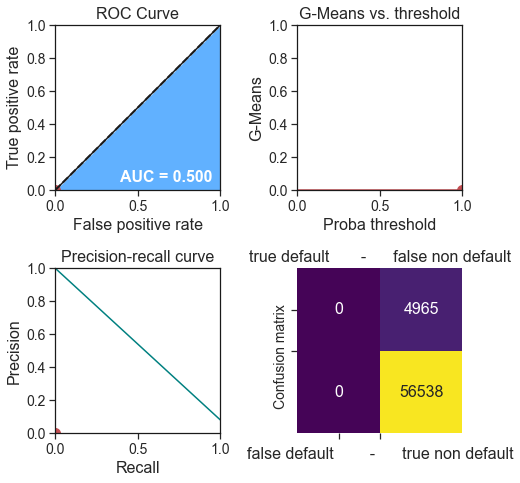

In [60]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
RMSE = {np.sqrt(mse):.0%}, \
recall= {recall:.0%}, \
precision= {precision:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

### LGBM 

In [35]:
df_pay = train[train.TARGET == 0]
df_unpay = train[train.TARGET == 1]

In [36]:
#pip install stats

In [37]:
#pip install scipy

In [38]:
import os
import gc
import csv
import zipfile
from urllib.request import urlretrieve
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

%matplotlib inline

rc = {"font.family": "Arial",
      "font.size": 16,        
      "axes.labelsize": 16,
      "axes.titlesize": 16,
      "legend.fontsize": 14, 
      "xtick.labelsize": 14, 
      "ytick.labelsize": 14}


def my_colors(n=5):
    return [(sns.color_palette("viridis", 100)[i]) for i in np.linspace(0, 99, n, dtype=int)]
def my_colors_r(n=5):
    return [(sns.color_palette("viridis_r", 100)[i]) for i in np.linspace(0, 99, n, dtype=int)]

sns.set(font="Arial", rc=rc, palette=my_colors())
sns.set_style("ticks", {"axes.edgecolor": "k", 
                        "axes.linewidth": 0.8, 
                        "axes.grid": False,
                        "xtick.major.width": 0.8, 
                        "ytick.major.width": 0.8})

#### LGBM/ROC

In [39]:
import timeit

 
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

start = timeit.default_timer()


weight = len(df_pay)/len(df_unpay)

lgbm = LGBMClassifier(max_depth=-1,
                      random_state=13,
                      silent=True,
                      metric='none',
                      n_jobs=-1,
                      n_estimators=200,
                      scale_pos_weight=weight,
                      )

lgbm_param = {'num_leaves': np.linspace(10, 80, 7, dtype='int'),
              'min_child_samples': stats.randint(100, 500),
              'min_child_weight': [1e-5, 1e-2, 1, 1e2, 1e4],
              'subsample': stats.uniform(loc=0.2, scale=0.8),
              'colsample_bytree': stats.uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0.1, 1,  10, 100],
              'reg_lambda': [0.1, 1, 10,  50, 100]}

grid_lgbm_roc = RandomizedSearchCV(lgbm,
                          lgbm_param,
                          n_iter=10,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)

model_lgbm_roc = grid_lgbm_roc.fit(X_fit, y_fit)
stop = timeit.default_timer()
print('Time: ', stop - start) 
print(round(grid_lgbm_roc.best_score_, 3))
print(grid_lgbm_roc.best_params_)
optima = pd.DataFrame(grid_lgbm_roc.cv_results_).T
optima

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time:  40.74974019999999
0.713
{'colsample_bytree': 0.5790696825335077, 'min_child_samples': 260, 'min_child_weight': 100.0, 'num_leaves': 68, 'reg_alpha': 100, 'reg_lambda': 50, 'subsample': 0.5976042668810364}


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,15.891532,15.520894,16.766774,15.892716,14.802463,13.253105,11.402078,8.591221,7.927836,7.68521
std_fit_time,0.723501,0.437269,0.06453,0.394306,0.51752,2.041516,0.055735,0.068116,0.170139,0.08373
mean_score_time,3.027471,2.874786,2.762101,2.589346,2.859243,2.350543,2.381931,1.503833,1.486135,2.059437
std_score_time,0.090379,0.120086,0.067142,0.038621,0.153042,0.27212,0.075631,0.034962,0.02855,0.030993
param_colsample_bytree,0.866621,0.85515,0.57907,0.66776,0.969457,0.813867,0.757122,0.471014,0.580131,0.863427
param_min_child_samples,174,344,260,246,280,124,343,465,397,241
param_min_child_weight,0.00001,1,100.0,0.00001,100.0,0.01,100.0,10000.0,10000.0,100.0
param_num_leaves,80,80,68,56,68,68,80,80,45,21
param_reg_alpha,10,10,100,100,0.1,100,10,100,10,1
param_reg_lambda,100,10,50,0.1,50,10,50,0.1,1,1


In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
y_prob = model_lgbm_roc.predict_proba(X_eval)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)

# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

mse = metrics.mean_squared_error(y_eval, y_prob)
auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)

TN = 38847, FP = 17691, FN = 1792, TP = 3173


TN = 38847, FP = 17691, FN = 1792, TP = 3173
Testset: threshold = 49%, G-Mean= 66%, AUC = 66%, RMSE = 56%, recall= 64%, precision= 15%, f1 = 25%


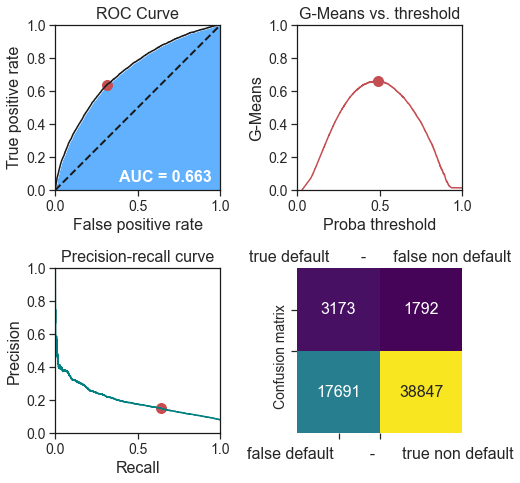

In [41]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
RMSE = {np.sqrt(mse):.0%}, \
recall= {recall:.0%}, \
precision= {precision:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

### RANDOM FOREST / AUC

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

start = timeit.default_timer()

rf = RandomForestClassifier(n_jobs=-1)

param_dist = {
            "n_estimators":[100,200],
            "criterion": ["gini"],
            "max_depth": [10,20,30,40,50,100,200,400],
            "max_features":[10,20,30,40,50,100,200,400],
            "bootstrap": [True, False]
            }

clf = RandomizedSearchCV( rf, 
                          param_distributions=param_dist,
                          n_iter=10,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)


model_rf_roc = clf.fit(X_fit, y_fit)
stop = timeit.default_timer()
print('Time: ', stop - start) 
print(round(clf.best_score_, 3))
print(clf.best_params_)
optima = pd.DataFrame(clf.cv_results_).T
optima

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time:  289.5272446
0.671
{'n_estimators': 200, 'max_features': 20, 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,73.97275,0.541394,3.435592,5.655088,228.091072,6.22446,227.670697,14.735392,16.172604,17.598108
std_fit_time,0.221423,0.055805,1.056264,0.827742,0.46532,1.665724,0.749162,0.329573,0.197014,1.029928
mean_score_time,12.26961,0.0,0.0,0.0,2.740223,0.0,2.457806,0.0,0.0,0.0
std_score_time,0.353363,0.0,0.0,0.0,0.24336,0.0,1.243143,0.0,0.0,0.0
param_n_estimators,100,100,200,200,200,100,200,200,100,100
param_max_features,10,50,200,100,20,200,20,200,50,100
param_max_depth,200,400,400,200,400,100,50,100,10,30
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini
param_bootstrap,True,False,True,True,True,True,True,False,False,False
params,"{'n_estimators': 100, 'max_features': 10, 'max...","{'n_estimators': 100, 'max_features': 50, 'max...","{'n_estimators': 200, 'max_features': 200, 'ma...","{'n_estimators': 200, 'max_features': 100, 'ma...","{'n_estimators': 200, 'max_features': 20, 'max...","{'n_estimators': 100, 'max_features': 200, 'ma...","{'n_estimators': 200, 'max_features': 20, 'max...","{'n_estimators': 200, 'max_features': 200, 'ma...","{'n_estimators': 100, 'max_features': 50, 'max...","{'n_estimators': 100, 'max_features': 100, 'ma..."


In [43]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
y_prob_rf_roc = model_rf_roc.predict_proba(X_eval)
y_prob = y_prob_rf_roc[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)

# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

mse = metrics.mean_squared_error(y_eval, y_prob)
auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)

TN = 37878, FP = 18660, FN = 2034, TP = 2931


TN = 37878, FP = 18660, FN = 2034, TP = 2931
Testset: threshold = 10%, G-Mean= 63%, AUC = 63%, RMSE = 58%, recall= 59%, precision= 14%, f1 = 22%


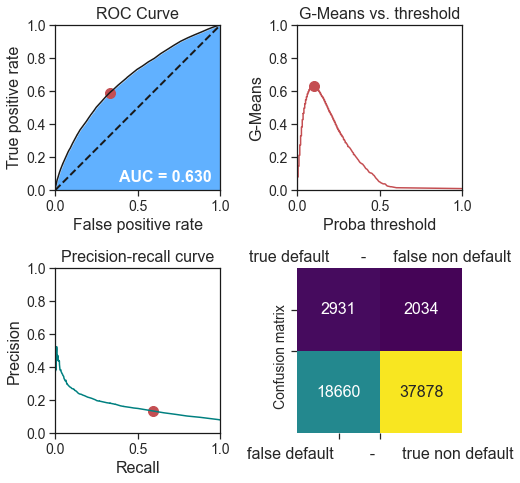

In [44]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
RMSE = {np.sqrt(mse):.0%}, \
recall= {recall:.0%}, \
precision= {precision:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

### Custom metric

Nous savons qu'un faux négatif coûte 10x plus cher qu'un faux positif, c'est pour ça que nous devons essayer d'avoir le moins de faux négatif possible, nous allons donc définir une nouvelle métrique.

In [52]:
def customScorer(y_test, y_pred, fn_value = 10, fp_value = 1):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()    
    scoreMetier = fn*fn_value + fp*fp_value
    return scoreMetier

In [53]:
from sklearn.metrics import make_scorer
scorer = make_scorer(customScorer ,greater_is_better = True)
#création de notre propre score grace à make_scorer 

In [54]:

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

start = timeit.default_timer()
weight = len(df_pay)/len(df_unpay)

lgbm = LGBMClassifier(max_depth=-1,
                      random_state=13,
                      silent=True,
                      metric='none',
                      n_jobs=-1,
                      n_estimators=200,
                      scale_pos_weight=weight,
                      )

lgbm_param = {'num_leaves': np.linspace(10, 80, 7, dtype='int'),
              'min_child_samples': stats.randint(100, 500),
              'min_child_weight': [1e-5, 1e-2, 1, 1e2, 1e4],
              'subsample': stats.uniform(loc=0.2, scale=0.8),
              'colsample_bytree': stats.uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0.1, 1,  10, 100],
              'reg_lambda': [0.1, 1, 10,  50, 100]}

grid_lgbm_c = RandomizedSearchCV(lgbm,
                          lgbm_param,
                          n_iter=10,
                          cv=3,
                          scoring=scorer,
                          n_jobs=-1,
                          verbose=True,
                          random_state=13)

model_lgbm_c = grid_lgbm_c.fit(X_fit, y_fit)
stop = timeit.default_timer()
print('Time: ', stop - start) 
print(round(grid_lgbm_c.best_score_, 3))
print(grid_lgbm_c.best_params_)
optima = pd.DataFrame(grid_lgbm_c.cv_results_).T
optima

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time:  32.87240040000006
49435.667
{'colsample_bytree': 0.47101361265918035, 'min_child_samples': 465, 'min_child_weight': 10000.0, 'num_leaves': 80, 'reg_alpha': 100, 'reg_lambda': 0.1, 'subsample': 0.7492619648246508}


,0,1,2,3,4,5,6,7,8,9
mean_fit_time,15.508367,15.472302,16.411841,15.315146,14.706491,12.843775,10.980537,8.230925,7.787322,7.683411
std_fit_time,0.193075,0.352662,0.062721,0.727677,0.235693,2.028888,0.198825,0.071938,0.047717,0.131414
mean_score_time,2.930866,2.903316,2.867414,2.658568,2.696831,2.35166,2.219201,1.140518,1.177751,1.518721
std_score_time,0.066811,0.029012,0.040649,0.029827,0.062681,0.399991,0.033245,0.028009,0.010313,0.03283
param_colsample_bytree,0.866621,0.85515,0.57907,0.66776,0.969457,0.813867,0.757122,0.471014,0.580131,0.863427
param_min_child_samples,174,344,260,246,280,124,343,465,397,241
param_min_child_weight,0.00001,1,100.0,0.00001,100.0,0.01,100.0,10000.0,10000.0,100.0
param_num_leaves,80,80,68,56,68,68,80,80,45,21
param_reg_alpha,10,10,100,100,0.1,100,10,100,10,1
param_reg_lambda,100,10,50,0.1,50,10,50,0.1,1,1


In [55]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score
y_prob = model_lgbm_c.predict_proba(X_eval)
y_prob = y_prob[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_eval, y_prob)
precision_, recall_, thresh_ = precision_recall_curve(y_eval, y_prob)


# calculate the g-mean for each threshold
g_means = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(g_means)

y_prob = (y_prob >= thresholds[ix]).astype(bool)

tn, fp, fn, tp = confusion_matrix(y_eval, y_prob).ravel()
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')
conf_mat = [[tp,fn],[fp,tn]]

mse = metrics.mean_squared_error(y_eval, y_prob)
auc = metrics.roc_auc_score(y_eval, y_prob)
recall = metrics.recall_score(y_eval, y_prob)
precision = metrics.precision_score(y_eval, y_prob)
f1 = metrics.f1_score(y_eval, y_prob)
mesureF = fbeta_score(y_eval, y_prob, beta = 1)
mesureF05 = fbeta_score(y_eval, y_prob, beta = 0.5)
mesureF2 = fbeta_score(y_eval, y_prob, beta = 2)

TN = 38899, FP = 17639, FN = 1872, TP = 3093


TN = 38899, FP = 17639, FN = 1872, TP = 3093
Testset: threshold = 51%, G-Mean= 65%, AUC = 66%, RMSE = 56%, recall= 62%, precision= 15%, f1 = 24%


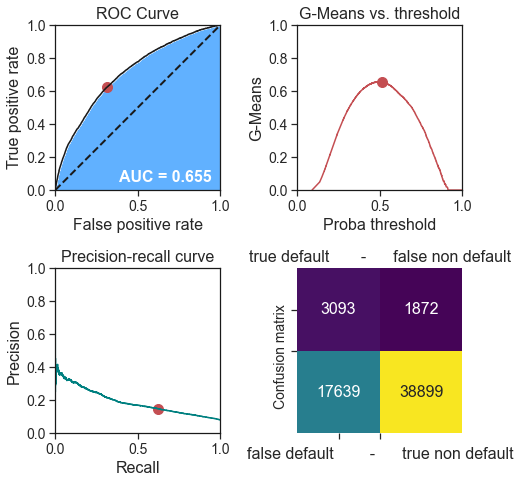

In [56]:
print(f'TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}')

######################################
print(f'Testset: \
threshold = {thresholds[ix]:.0%}, \
G-Mean= {g_means[ix]:.0%}, \
AUC = {auc:.0%}, \
RMSE = {np.sqrt(mse):.0%}, \
recall= {recall:.0%}, \
precision= {precision:.0%}, \
f1 = {f1:.0%}')
######################################

plt.figure(figsize=(7, 7))

plt.subplot(221)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")
plt.plot(fpr, tpr, 'k')
plt.plot([0, 1], [0, 1], '--', lw=2, color='k')
plt.fill_between(fpr, tpr, facecolor='dodgerblue', alpha=0.7)
plt.scatter(fpr[ix], tpr[ix], marker='o', s=100, color='r', label='Best')
plt.text(0.95, 0.05, f'AUC = {auc:.3f}', ha='right',
         fontsize=16, weight='bold', color='white')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.subplot(222)
plt.plot(thresholds, g_means, 'r');
plt.scatter(thresholds[ix], g_means[ix], marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Proba threshold')
plt.ylim(0,1)
plt.ylabel('G-Means')
plt.title('G-Means vs. threshold')

plt.subplot(223)
plt.plot(recall_, precision_, 'teal');
plt.scatter(recall, precision, marker='o', s=100, color='r', label='Best')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylim(0,1)
plt.ylabel('Precision')
plt.title('Precision-recall curve')

plt.subplot(224)
sns.heatmap(conf_mat, cmap=my_colors(100), annot=True, fmt='.0f', cbar=False)
plt.xticks([0.5,1], ["",""])
plt.yticks([0.5,1], ["Confusion matrix",""])
plt.xlabel('false default        -      true non default')

plt.title('true default       -      false non default')

plt.tight_layout(pad=1.1)
plt.show()

## Final retraining

In [57]:
# Load libraries
import sklearn
import joblib
from sklearn.impute import SimpleImputer

# Split features and targets
X = train.drop(columns='TARGET')
y = train['TARGET']

# Imputations
imp_mean = SimpleImputer(strategy='median')
imp_mean.fit(X)
X = pd.DataFrame(imp_mean.transform(X), columns=feature_names)

# Re-training the final model on the whole set
model_lgbm_roc.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(metric='none', n_estimators=200,
                                            random_state=13,
                                            scale_pos_weight=11.387150050352467,
                                            silent=True),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021218B84EB0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000212049CBCD0>,
                                        'min_child_weight': [1e-05, 0.01, 1,
                                                             100.0, 10000.0],
                                        'num_leaves': array([10, 21, 33, 45, 56, 68, 80]),
                                        'reg_alpha': [0.1, 1, 10, 100],
                                        'reg_lambda': [0.1, 1, 10, 50, 100],


## Saving model

In [58]:
# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the models as pickle files
joblib.dump(model_lgbm_roc, "models/model_lgbm.pkl".format(version=scikit_version))

['models/model_lgbm.pkl']